#### Instructions
###### Follow the instructions given in comments prefixed with ## and write your code below that.
###### Also fill the partial code in given blanks.
###### Don't make any changes to the rest part of the codes
###### Duetime:1:30 PM

In [1]:
import cv2                              ## import cv2
import numpy as np                      ## import numpy
import matplotlib.pyplot as plt         ## import matplotlib pyplot
from sklearn.cluster import KMeans      ## import KMeans cluster from sklearn
from scipy.spatial import distance      ## import distance from scipy.spatial
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

import warnings
warnings.filterwarnings('ignore')

In [ ]:
'''%pip install matplotlib
%pip install opencv-python
%pip install scikit-learn'''

## Face Detection on given image

In [2]:
## Reading the image plaksha_Faculty.jpg
img = cv2.imread('Plaksha_Faculty.jpg')

## Convert the image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

## Loading the required haar-cascade xml classifier file
path = './cascades/haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier(path)    # Loading a pre-trained Haar cascade

# Applying the face detection method on the grayscale image.
## Change the parameters for better detection of faces in your case.
faces_rect = face_cascade.detectMultiScale(gray_img, scaleFactor = 1.03, minNeighbors = 9, 
                                flags = cv2.CASCADE_SCALE_IMAGE, minSize=(25, 25), maxSize = (50, 50))

# Define the text and font parameters
text = 'Detected Faces'                 ## The text you want to write
font = cv2.FONT_HERSHEY_SIMPLEX         ## Font type
font_scale = 1                          ## Font scale factor
font_color = (100, 149, 247)            ## Text color in BGR format (here, it's red)
font_thickness = 2                      ## Thickness of the text

org = (550, 75)

img_copy = img.copy()

# Iterating through rectangles of detected faces
for (x, y, w, h) in faces_rect:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
    # Use cv2.putText to add the text to the image, Use text, font, font_scale, font_color, font_thickness here
    cv2.putText(img, text, org, font,  
                   font_scale, font_color, font_thickness, cv2.LINE_AA)

## Display the image and window title should be "Total number of face detected are #"
cv2.imshow(f'Total number of face detected are {len(faces_rect)}', img)
#cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Visualising images by their hue and saturation features

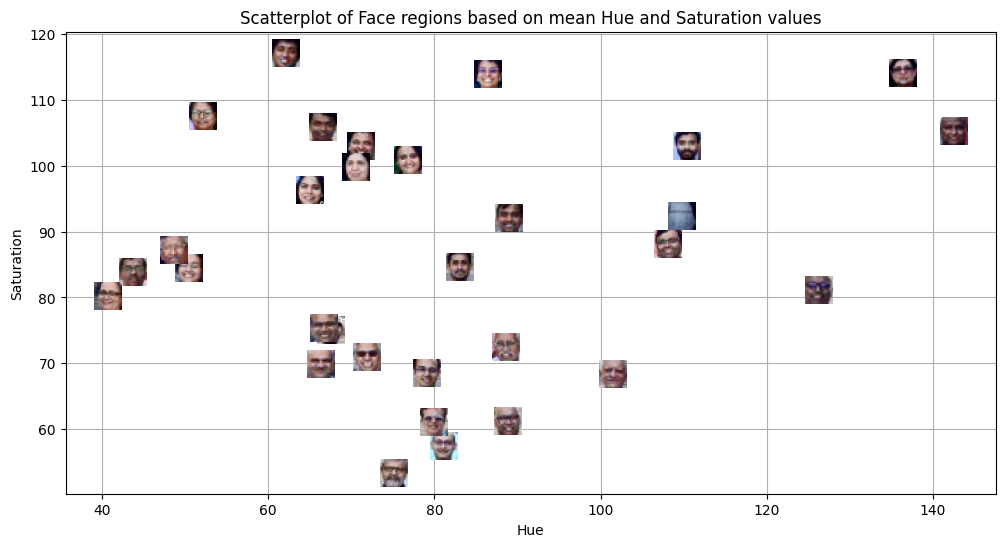

In [3]:

from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Extract face region features (Hue and Saturation)

## Call the img and convert it from BGR to HSV and store in img_hsv
img_hsv = cv2.cvtColor(img_copy, cv2.COLOR_BGR2HSV)      
hue_saturation = []
face_images = []                # To store detected face images

for (x, y, w, h) in faces_rect:
    face = img_hsv[y:y + h, x:x + w]

    hue =   np.mean(face[:, :, 0])                  ## Extract mean hue for the face
    saturation =  np.mean(face[:, :, 1])            ## Extract mean saturation for the face

    hue_saturation.append((hue, saturation))
    face_images.append(face)

hue_saturation = np.array(hue_saturation)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers
for i, (x,y,w,h ) in enumerate(faces_rect):
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1])


plt.xlabel('Hue')                                                                   ## Put x label
plt.ylabel('Saturation')                                                            ## Put y label
plt.title('Scatterplot of Face regions based on mean Hue and Saturation values')    ## Put title
plt.grid(True)                                                                      ## Put grid
plt.show()                                                                          ## Show the plot

## Assign class labels to each face using kmeans. Visualise the clusters formed

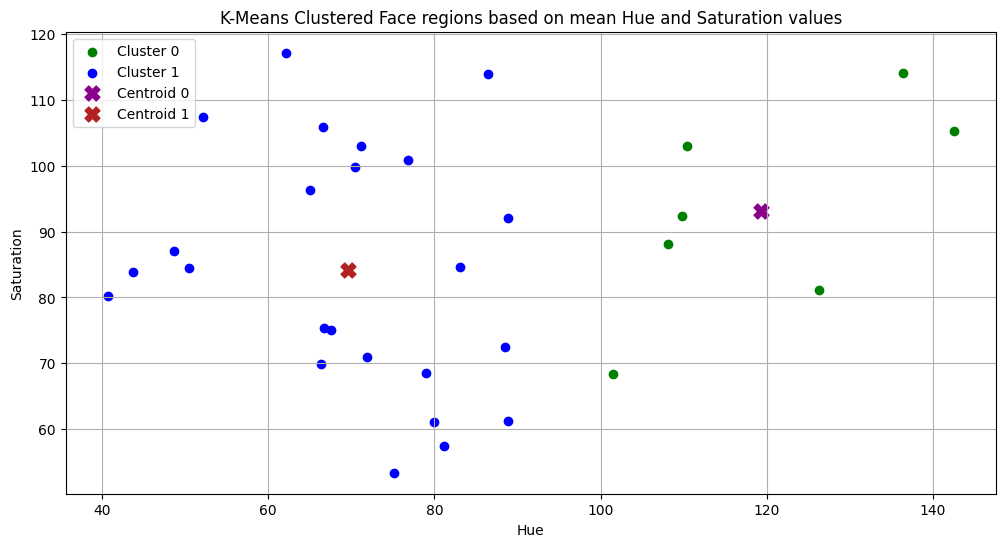

In [4]:
## Perform k-Means clustering on hue_saturation and store in kmeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(hue_saturation)

#centroids = kmeans.cluster_centers_
#labels = kmeans.labels_

# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Collect points for cluster plot
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))


cluster_0_points = np.array(cluster_0_points)
## Plot points for cluster 0 in green
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], color = 'green')
legend_labels.append('Cluster 0')
 

cluster_1_points = np.array(cluster_1_points)
## Plot points for cluster 1 in blue
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], color = 'blue')
legend_labels.append('Cluster 1')

## Calculate and plot centroids
centroid_0 = np.mean(cluster_0_points, axis = 0)
centroid_1 = np.mean(cluster_1_points, axis = 0)

# Plot both the centroid for cluster 0 and cluster 1
plt.scatter(centroid_0[0], centroid_0[1], color = 'darkmagenta', marker='X', s = 115)
plt.scatter(centroid_1[0], centroid_1[1], color = 'firebrick', marker='X', s = 115)

legend_labels.append('Centroid 0')
legend_labels.append('Centroid 1')

plt.xlabel('Hue')                                                                   ## Put x label
plt.ylabel('Saturation')                                                            ## Put y label
plt.title('K-Means Clustered Face regions based on mean Hue and Saturation values') ## Put title
plt.legend(legend_labels, loc = 'best')                                             ## Add a legend
plt.grid(True)                                                                      ## Put grid
plt.show()    


## Face detection on shashi tharoor

In [5]:
## Read the class of the template image 'Dr_Shashi_Tharoor.jpg' using cv2 and store it in template_img
template_img = cv2.imread('Shashi_Tharoor.jpeg')

# Detect face  in the template image after converting it to gray and store it in template_faces

# Convert template image to grayscale
gray_template_img = cv2.cvtColor(template_img, cv2.COLOR_BGR2GRAY)        

# Find the co-ordinates of the bounding box for face detection in template image
template_faces = face_cascade.detectMultiScale(gray_template_img, scaleFactor = 1.05, minNeighbors = 5, 
                                                flags = cv2.CASCADE_SCALE_IMAGE)

template_img_copy = template_img.copy()

# Draw rectangles around the detected faces
for (x, y, w, h) in template_faces:
    cv2.rectangle(template_img, (x, y), (x + w, y + h), (0, 255, 0), 3)

cv2.imshow('Face Detection in Template Image', template_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Plot template image along with other images

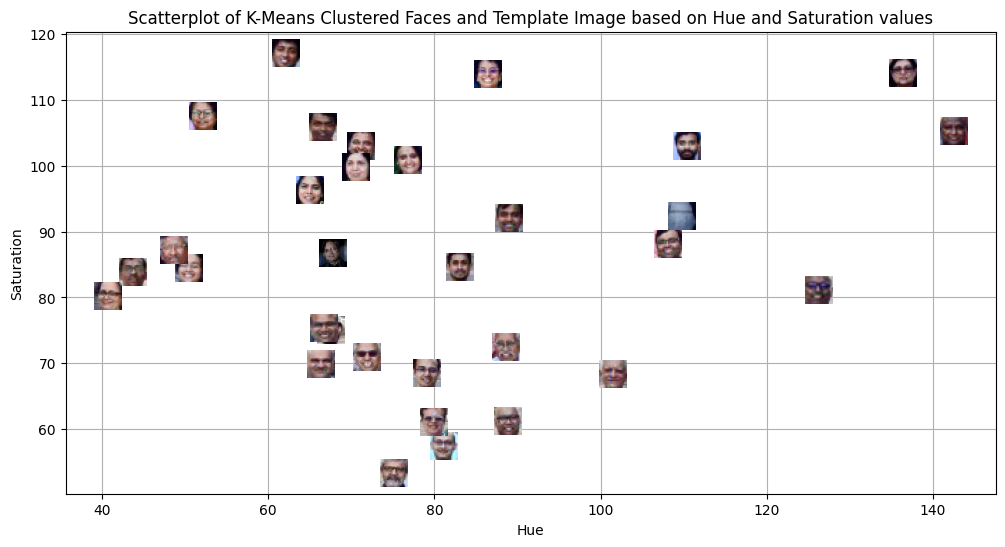

In [6]:
# Convert the template image to HSV color space and store it in template_hsv
template_hsv = cv2.cvtColor(template_img_copy, cv2.COLOR_BGR2HSV)

# Extract hue and saturation features from the template image as we did it for detected faces.
template_hue = np.mean(template_hsv[:, :, 0])
template_saturation = np.mean(template_hsv[:, :, 1])

# Create a figure and axis for visualization
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces, along with the template face
for i, (x, y, w, h) in enumerate(faces_rect):
    color = 'red' if kmeans.labels_[i] == 0 else 'blue'
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], 'o', markersize=5, color=color)

# Plot the template image
im = OffsetImage(cv2.cvtColor(cv2.resize(template_img_copy, (20, 20)), cv2.COLOR_BGR2RGB))
ab = AnnotationBbox(im, (template_hue, template_saturation), frameon=False, pad=0)
ax.add_artist(ab)

## Put x label
## Put y label
## Put title
## Add grid
## show plot

plt.xlabel('Hue')                                                                   ## Put x label
plt.ylabel('Saturation')                                                            ## Put y label
title = 'Scatterplot of K-Means Clustered Faces and Template Image based on Hue and Saturation values'
plt.title(title)                                                                    ## Put title
plt.grid(True)                                                                      ## Put grid
plt.show()                                                                          ## Show the plot

## Perform classification on new image using distance from clusters. Visualise the clusters.

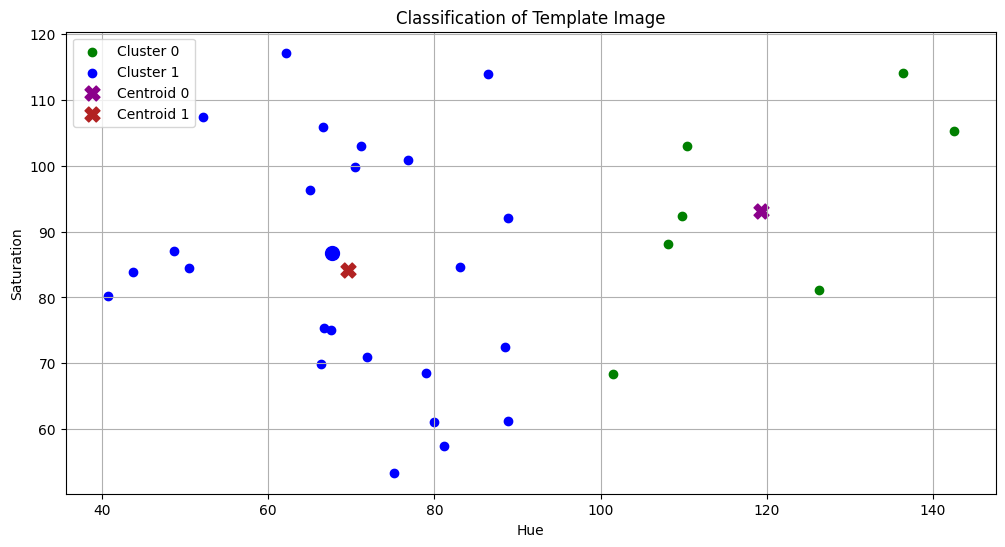

In [7]:
## Find distance for new image from each cluster.
## Predict the cluster label for the template image and store it in template_label.

distances = distance.cdist([[template_hue, template_saturation]], [centroid_0, centroid_1], 
                                metric = 'euclidean')
template_label = np.argmin(distances)

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

# Plot points for cluster 0 in green
cluster_0_points = np.array(cluster_0_points)
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], color = 'green', label = 'Cluster 0')

# Plot points for cluster 1 in blue
cluster_1_points = np.array(cluster_1_points)
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], color = 'blue', label = 'Cluster 1')


# Assign color to the template image based on class label
if template_label == 0:
    color = 'red'
else:
    color = 'blue'

# Calculate and plot centroids for both the clusters
centroid_0 = np.mean(cluster_0_points, axis = 0)
centroid_1 = np.mean(cluster_1_points, axis = 0)

## Plot for centroid 0
plt.scatter(centroid_0[0], centroid_0[1], color = 'darkmagenta', marker='X', s = 115, 
                    label = 'Centroid 0') 

## Plot for centroid 1
plt.scatter(centroid_1[0], centroid_1[1], color = 'firebrick', marker='X', s = 115, 
                    label = 'Centroid 1')  


# Plot the template image's position with appropriate class color
plt.plot(template_hue, template_saturation, marker='o', c= color, markersize= 10, 
                    label = 'Template Image')

plt.xlabel('Hue')                                                                   ## Put x label
plt.ylabel('Saturation')                                                            ## Put y label
plt.title('Classification of Template Image')                                       ## Put title
plt.legend(legend_labels, loc = 'best')                                             ## Add a legend
plt.grid(True)                                                                      ## Put grid
plt.show()                                                                          ## Show plot

                                            ## End of the lab 5 ##